In [1]:
# Logistic Regression : Binary classification

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
age_mean = int(df.Age.mean())
df.Age = df.Age.fillna(age_mean)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
dfl = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']]
dfl

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,29.0,1,2,S
889,1,1,male,26.0,0,0,C


In [6]:
dummies = pd.get_dummies(dfl.Sex)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [7]:
dfa = pd.concat([dfl,dummies],axis='columns')
dfa

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,female,male
0,0,3,male,22.0,1,0,S,0,1
1,1,1,female,38.0,1,0,C,1,0
2,1,3,female,26.0,0,0,S,1,0
3,1,1,female,35.0,1,0,S,1,0
4,0,3,male,35.0,0,0,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,0,1
887,1,1,female,19.0,0,0,S,1,0
888,0,3,female,29.0,1,2,S,1,0
889,1,1,male,26.0,0,0,C,0,1


In [8]:
dfa = dfa.drop(['Sex','Embarked'],axis='columns')
dfa

,Survived,Pclass,Age,SibSp,Parch,female,male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,0,1
887,1,1,19.0,0,0,1,0
888,0,3,29.0,1,2,1,0
889,1,1,26.0,0,0,0,1


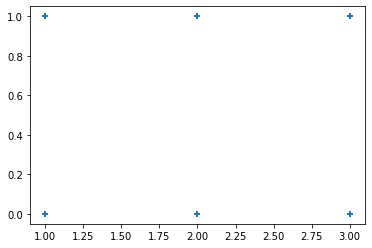

In [9]:
plt.scatter(dfa.Pclass,dfa.Survived,marker='+')

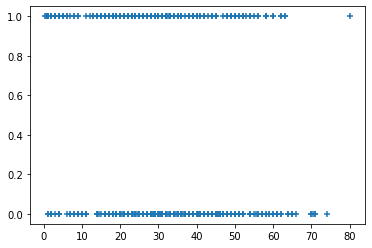

In [10]:
plt.scatter(dfa.Age,dfa.Survived,marker='+')

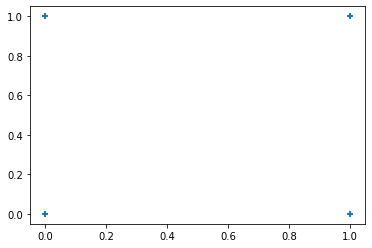

In [11]:
plt.scatter(dfa.male,dfa.Survived,marker='+')

In [12]:
X = dfa.drop(['Survived'],axis='columns')
y = dfa.Survived

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [14]:
X_train

,Pclass,Age,SibSp,Parch,female,male
215,1,31.0,1,0,1,0
854,2,44.0,1,0,1,0
107,3,29.0,0,0,0,1
311,1,18.0,2,2,1,0
327,2,36.0,0,0,1,0
...,...,...,...,...,...,...
451,3,29.0,1,0,0,1
707,1,42.0,0,0,0,1
453,1,49.0,1,0,0,1
228,2,18.0,0,0,0,1


In [15]:
X_test

,Pclass,Age,SibSp,Parch,female,male
566,3,19.0,0,0,0,1
445,1,4.0,0,2,0,1
628,3,26.0,0,0,0,1
719,3,33.0,0,0,0,1
506,2,33.0,0,2,1,0
...,...,...,...,...,...,...
704,3,26.0,1,0,0,1
467,1,56.0,0,0,0,1
261,3,3.0,4,2,0,1
192,3,19.0,1,0,1,0


In [16]:
y_test

566    0
445    1
628    0
719    0
506    1
      ..
704    0
467    0
261    1
192    1
698    0
Name: Survived, Length: 268, dtype: int64

In [17]:
model = LogisticRegression()
model.fit(X_train,y_train)
model.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [18]:
model.predict_proba(X_test)

array([[0.85170986, 0.14829014],
       [0.30811026, 0.69188974],
       [0.88022217, 0.11977783],
       [0.90387106, 0.09612894],
       [0.21119237, 0.78880763],
       [0.89091889, 0.10908111],
       [0.86038513, 0.13961487],
       [0.87259699, 0.12740301],
       [0.88022217, 0.11977783],
       [0.40602922, 0.59397078],
       [0.85610187, 0.14389813],
       [0.89220333, 0.10779667],
       [0.30758196, 0.69241804],
       [0.92116641, 0.07883359],
       [0.93041507, 0.06958493],
       [0.89091889, 0.10908111],
       [0.9348382 , 0.0651618 ],
       [0.89091889, 0.10908111],
       [0.95916099, 0.04083901],
       [0.6682028 , 0.3317972 ],
       [0.24558993, 0.75441007],
       [0.4508992 , 0.5491008 ],
       [0.89091889, 0.10908111],
       [0.44518778, 0.55481222],
       [0.19518145, 0.80481855],
       [0.85610187, 0.14389813],
       [0.60747661, 0.39252339],
       [0.44518778, 0.55481222],
       [0.54742128, 0.45257872],
       [0.11597568, 0.88402432],
       [0.

In [19]:
model.score(X_test,y_test)

0.8208955223880597

In [20]:
model.predict([[1,22,0,0,1,0]])

array([1], dtype=int64)